In [1]:
import numpy as np
from data_utils import *
from matplotlib import pyplot as plt
from genetic_algorithm import *
from tft_player import TFTPlayer
from random_player import RandomPlayer

## Setup

The first section of this code finds the score of a TIT FOR TAT player against the same opponents that the GA player faces in each eval function. This TIT FOR TAT score will be used as a baseline to interpret the results of the GA.

In [2]:
tft_avg_score = fitness_games(PDPlayer(TFTPlayer()))
random_avg_scores = []
for _ in range(100):
    random_avg_scores.append(fitness_games(PDPlayer(RandomPlayer())))
print(tft_avg_score)
print(random_avg_scores)

412.5
[365.8333333333333, 377.1666666666667, 356.6666666666667, 324.0, 348.3333333333333, 362.6666666666667, 349.0, 372.5, 354.3333333333333, 337.5, 386.8333333333333, 341.0, 334.6666666666667, 345.5, 365.8333333333333, 351.0, 351.3333333333333, 332.0, 350.6666666666667, 338.5, 361.6666666666667, 359.5, 345.1666666666667, 379.8333333333333, 350.3333333333333, 357.0, 372.5, 369.1666666666667, 383.3333333333333, 341.8333333333333, 369.1666666666667, 346.3333333333333, 376.5, 342.0, 342.0, 358.6666666666667, 334.8333333333333, 367.0, 363.3333333333333, 360.0, 361.6666666666667, 368.6666666666667, 377.0, 338.1666666666667, 337.3333333333333, 365.8333333333333, 347.8333333333333, 369.6666666666667, 367.5, 349.0, 344.5, 345.1666666666667, 362.8333333333333, 356.1666666666667, 360.0, 357.8333333333333, 344.6666666666667, 344.3333333333333, 353.1666666666667, 352.3333333333333, 346.6666666666667, 337.8333333333333, 351.1666666666667, 344.8333333333333, 344.6666666666667, 352.8333333333333, 359

## Genetic Algorithm

The code below both sets up, runs, and plots the results of the genetic algorithm. The original experiment was run for only 50 generations, but because our computers are 40 years more advanced we can run it for 100 without any issue.

In [3]:
runs = 40
max_gens = 100
pop_size = 20
gene_length = 70
mut_prob = 0.01
xover_rate = .3
xover_fcn = crossover
num_elites = int(pop_size*0.2)

In [4]:
fits = run_n_times(max_gens,pop_size, gene_length, mut_prob,xover_rate,xover_fcn,num_elites, fitness_games,runs)
results_df = make_df_from_results(fits)

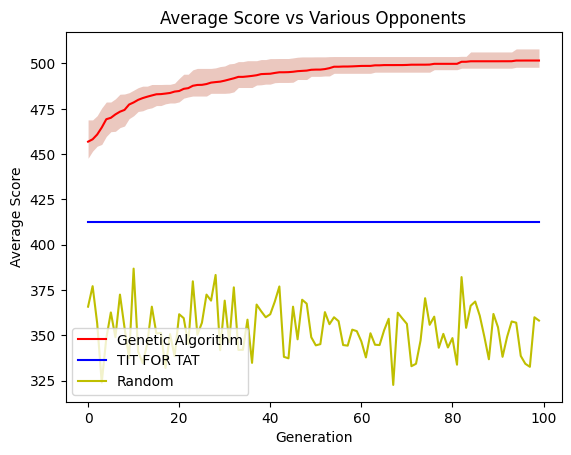

In [5]:
a,b,c = make_quartiles(results_df)
gen_nums = np.arange(max_gens)
tft_line = np.full(gen_nums.size, tft_avg_score)
random_line = np.array(random_avg_scores)
plt.figure()
plt.title('Average Score vs Various Opponents')
plt.xlabel('Generation')
plt.ylabel('Average Score')
plt.plot(gen_nums,a,'r', label='Genetic Algorithm')
plt.fill_between(gen_nums,b,c, alpha=0.25, linewidth=0, color='#B22400')
plt.plot(gen_nums, tft_line, 'b', label='TIT FOR TAT')
plt.plot(gen_nums, random_line, 'y', label="Random")
plt.legend()

## Original Results

This result is incredibly interesting for many reasons. The first odd observation is that the genetic algorithm starts significantly higher than the completely random algorithm. The only difference between the GA and the random player at this point is that the GA will respond to a condition (3 previous inputs) in the exact same way each time. Otherwise, the response itself is completely random. It's amazing that with just this fact the GA is able to score so much higher so immediately, but given the fact that the GA score is based off of the fittest individual in the population at a given generation, it makes sense. With the simple players the GA faces in the fitness function, only a few locuses of the genome will actually be relevant, so it won't take particularly long to maximize this. As we can see in the graph, the fitness seems to level out around generation 50.

The TIT FOR TAT player also seems to perform particularly poorly against the pattern players, which the fitness function weights more heavily than the simple AI player.

## Revised Results

You can almost see my thought process. As I was writing down the previous section, I realized that the pattern players weighed into the fitness function significantly more than the simple AI player, so I went into the fitness function and made the pattern player weighted 50/50 with the simple AI player. The results were relatively unchanged, but the deviation in the genetic algorithm dropped significantly. Otherwise, the average scores net increased as a whole.